In [15]:
import torch 
import matplotlib.pyplot as plt
%matplotlib inline

# Implementing Bigram Model 

In [13]:


chars = list('abcdefghijklmnopqrstuvwxyz')  
words = open('names.txt', 'r').read().splitlines()
 

In [19]:
N = torch.zeros((27,27),dtype = torch.int32) # init 
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0 
itos = {i:s for s,i in stoi.items()} 
#stoi , itos 

In [22]:
for w in words : 
  chs = ['.'] + list(w) + ['.']
  for u,v in zip(chs,chs[1:]):
    x = stoi[u]
    y = stoi[v]
    N[x,y]+=1 
#N,N.size()

torch.Size([27, 27])

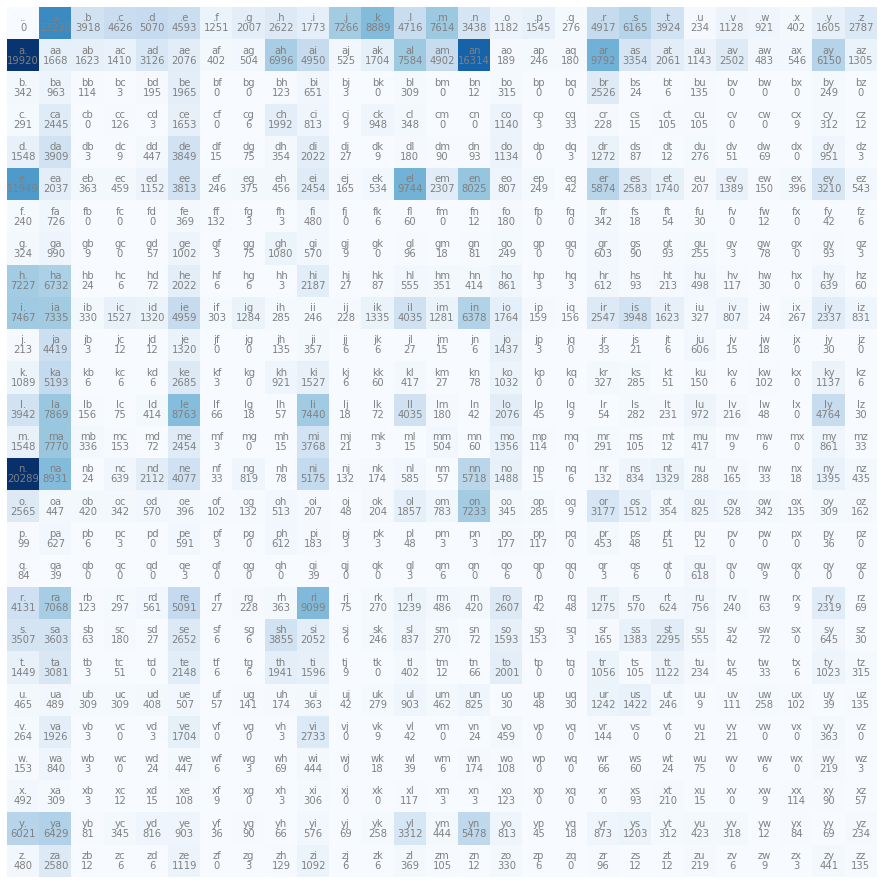

In [23]:
# yoinked for vis, maps freq 
plt.figure(figsize=(16,16))
plt.imshow(N, cmap='Blues')
for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color='gray')
        plt.text(j, i, N[i, j].item(), ha="center", va="top", color='gray')
plt.axis('off');

In [39]:
p = N[0].float() 
p/=p.sum()
p,p.sum()  #normalized vals

(tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
         0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
         0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290]),
 tensor(1.))

In [41]:
g = torch.Generator().manual_seed(2147483647)
ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
ix,itos[ix]

(13, 'm')

In [33]:
g = torch.Generator().manual_seed(2147483647)
p = torch.rand(3, generator=g)
p = p / p.sum()
p , p.sum() # 3 samples

(tensor([0.6064, 0.3033, 0.0903]), tensor(1.))

In [45]:
torch.multinomial(p,num_samples = 100 , replacement = True , generator = g) 


tensor([ 4,  4, 13, 13,  8, 13,  1,  2,  4,  1,  6,  1,  1, 10, 14, 10, 13, 12,
        10,  1,  1, 20, 18, 20, 19,  1, 12, 11, 10, 11, 18, 18, 14, 20,  2,  5,
        26,  4,  3, 20,  5, 19, 13, 12, 10,  2, 12,  2, 11, 20, 26, 19, 10, 25,
        20, 14, 13,  9,  4, 11, 13, 13, 13, 12,  4, 20, 14, 15, 19, 10,  4, 11,
        18,  4,  6, 19, 19,  4,  5, 11, 14, 18, 24, 25, 12, 16, 19,  2, 19, 19,
        13, 13,  4,  1,  1, 23,  3,  8,  1, 11])

In [47]:
P =(N+1).float() # +1 to avoid 0's in the matrix which affects the compute later 
P,P.shape

(tensor([[1.0000e+00, 1.3231e+04, 3.9190e+03, 4.6270e+03, 5.0710e+03, 4.5940e+03,
          1.2520e+03, 2.0080e+03, 2.6230e+03, 1.7740e+03, 7.2670e+03, 8.8900e+03,
          4.7170e+03, 7.6150e+03, 3.4390e+03, 1.1830e+03, 1.5460e+03, 2.7700e+02,
          4.9180e+03, 6.1660e+03, 3.9250e+03, 2.3500e+02, 1.1290e+03, 9.2200e+02,
          4.0300e+02, 1.6060e+03, 2.7880e+03],
         [1.9921e+04, 1.6690e+03, 1.6240e+03, 1.4110e+03, 3.1270e+03, 2.0770e+03,
          4.0300e+02, 5.0500e+02, 6.9970e+03, 4.9510e+03, 5.2600e+02, 1.7050e+03,
          7.5850e+03, 4.9030e+03, 1.6315e+04, 1.9000e+02, 2.4700e+02, 1.8100e+02,
          9.7930e+03, 3.3550e+03, 2.0620e+03, 1.1440e+03, 2.5030e+03, 4.8400e+02,
          5.4700e+02, 6.1510e+03, 1.3060e+03],
         [3.4300e+02, 9.6400e+02, 1.1500e+02, 4.0000e+00, 1.9600e+02, 1.9660e+03,
          1.0000e+00, 1.0000e+00, 1.2400e+02, 6.5200e+02, 4.0000e+00, 1.0000e+00,
          3.1000e+02, 1.0000e+00, 1.3000e+01, 3.1600e+02, 1.0000e+00, 1.0000e+00,
    